# Assignment 2
**Due date** December 6th, 2024.

Please fo not forget to add your names, student IDs, and emails in this file.<br>
**Only submit one file per team**

<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

1426508  Zhang,Jason  zhang642@mcmaster.ca
400434545   Shang,Ziqi   shangz6@mcmaster.ca

In [121]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## (Q1) Linear Regression
* For **Q1** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

To Do: Write an introduction to the linear regression. <br>

The following data is based on a Polynomial expansion to predict the electronic energy of methane for different geometries. <br>
We will follow the work presented in the paper, [paper link](https://pubs.acs.org/doi/full/10.1021/acs.jctc.9b00043)<br>
"*Using Gradients in Permutationally Invariant Polynomial Potential Fitting: A Demonstration for CH4 Using as Few as 100 Configurations*".

The main idea is to expand the inter-atomic distance of the 5 atoms in terms on a polynomial expansion,
$$
y = \sum^{np}_{i} w_i \phi_i(\mathbf{r})
$$
where $w_i$ are the weights, $\phi_i$ are the Permutationally Invariant Polynomial expansion, and $\mathbf{r}$ are the inter-atomic distances.

In the dataset provided, the values of the vector $\mathbf{\phi}(\mathbf{r})^\top = [\phi_0(\mathbf{r}),\cdots,\phi_{np}(\mathbf{r})]$, are in each column of a raw, with the respective energy in the last column.


## (Q1.A) Data preprocessing
1. Load the dataset from the provided link and print the first few rows.<br>
    (https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv)<br>
    1. Answer the following questions,
       1. How many points does the dataset contains?
       2. What is the point with the lowest energy and what is its value?
       3. What is the range of energies in the dataset?
       4. Do a histogram of the energy.
   

In [122]:
url = "https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv"

Print the first three lines

In [123]:
mydata = pd.read_csv(url)
print (mydata.head(3))

   Unnamed: 0  phi_0     phi_1     phi_2     phi_3     phi_4     phi_5  \
0           0    1.0  0.206794  0.047658  0.016033  0.004927  0.000189   
1           1    1.0  0.204853  0.047194  0.015728  0.004834  0.000186   
2           2    1.0  0.202104  0.046530  0.015310  0.004705  0.000180   

      phi_6     phi_7     phi_8  ...    phi_21    phi_22    phi_23    phi_24  \
0  0.004928  0.000757  0.010698  ...  0.001659  0.000255  0.000255  0.000039   
1  0.004834  0.000740  0.010509  ...  0.001613  0.000248  0.000248  0.000038   
2  0.004699  0.000718  0.010226  ...  0.001549  0.000238  0.000238  0.000037   

     phi_25    phi_26    phi_27    phi_28    phi_29     energy  
0  0.000003  0.000039  0.000012  0.000554  0.000003 -40.483220  
1  0.000003  0.000038  0.000012  0.000540  0.000003 -40.481880  
2  0.000003  0.000037  0.000011  0.000518  0.000003 -40.480698  

[3 rows x 32 columns]


The number of datapoints:

In [124]:
# 1. How many points does the dataset contains?
print ("Number of data points is " ,len(mydata))

Number of data points is  9000


Finding the lowest energy:

In [125]:
# 2. What is the point with the lowest energy and what is its value?
print("The Lowest Energy is ", min(mydata['energy']))

The Lowest Energy is  -40.48363


Finding the range of the energies

In [126]:
# 3. What is the range of energies in the dataset? The energy is reported in Hartree

print(min(mydata['energy']), "to", max(mydata['energy']))

-40.48363 to -40.416504


Creating a Histogram of Energies

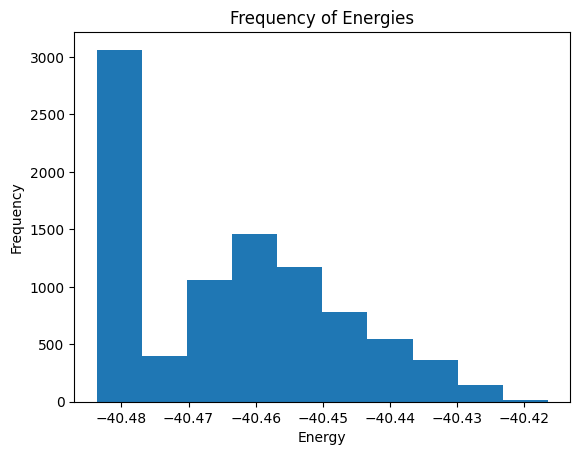

In [127]:
# 4. Do a histogram of the energy.
plt.hist(mydata['energy']) # I can't believe there's a function for this
plt.xlabel("Energy")
plt.ylabel("Frequency")
plt.title("Frequency of Energies")
plt.show()

## (Q1.B) Data splitting fitting
Before you carry each of these three different strategies to find the optimal mode, you first need to,
   1. Sample **100** random points (training points), and other **500** random points (test points). <br>
   Use the randomly sampled 100 points only for training, and the other 500 to test accuracy of the three different models. <br>

In [128]:
# Q1.B Data splitting for training and testing.
# code here,
td = mydata.sample(n=100) #td is training data. I sample 100 of them
tp = mydata.sample(n=500) #tp is testpoints. I sample 500
print(td)
print(tp)

      Unnamed: 0  phi_0     phi_1     phi_2     phi_3     phi_4     phi_5  \
5804        5804    1.0  0.180094  0.040087  0.012052  0.003561  0.000134   
8057        8057    1.0  0.181270  0.045457  0.012261  0.004129  0.000194   
6687        6687    1.0  0.209437  0.057095  0.016356  0.005939  0.000341   
3443        3443    1.0  0.194949  0.045346  0.013900  0.004286  0.000157   
5683        5683    1.0  0.169387  0.039625  0.010747  0.003378  0.000121   
...          ...    ...       ...       ...       ...       ...       ...   
4312        4312    1.0  0.176224  0.039827  0.011493  0.003515  0.000124   
6277        6277    1.0  0.201519  0.051217  0.015115  0.005132  0.000250   
6485        6485    1.0  0.161265  0.035608  0.009682  0.002813  0.000112   
2875        2875    1.0  0.199792  0.045731  0.014963  0.004570  0.000174   
5184        5184    1.0  0.221428  0.054678  0.018256  0.006063  0.000259   

         phi_6     phi_7     phi_8  ...    phi_21    phi_22    phi_23  \
58

## (Q1.C) Model fitting,
The main goal of this section is to train this regression model using,
   1. Exact solution
   2. Gradient descent
      1. Do not forget to play around with the $\eta$ parameter for gradient descent,
      2. How many iterations do you need to reach a "good" model.
      3. Plot the value of the training error as a function of the iterations in gradient descent, (this is known as **learning curves**).
   3. SVD for linear regression

**Extra results you need to include,**
1. In a single figure, plot the vector of the optimal linear weights of the three models, label each curve.
2. For each model, create a figure where you plot **predicted vs true** values of the training and test points (use different symbols to identify training and test points). <br>
In each figure, also display the [$r^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) value.
3. What of the three models had the best performance?
4. Choose the model with the lowest test error, you can use root mean squared error, and see how much the test error will change if we sample another *100* points from the untouched data as the new training points.
Do this 5 times so we can compute the mean and standard deviation of the test error.


In [129]:
# Q1.B Data splitting for training and testing.
# code here,
td = td.to_numpy() # Generate array to store data
tp = tp.to_numpy() # Generate array to store data

# Training Set
Exact Solution

[[1.00000000e+00 1.80093880e-01 4.00869060e-02 ... 7.48982940e-06
  3.95067180e-04 2.27440820e-06]
 [1.00000000e+00 1.81269650e-01 4.54568680e-02 ... 1.08202750e-05
  3.88177840e-04 3.88032100e-06]
 [1.00000000e+00 2.09437420e-01 5.70954120e-02 ... 2.00356100e-05
  6.04159800e-04 1.04728915e-05]
 ...
 [1.00000000e+00 1.61265390e-01 3.56084300e-02 ... 5.34572300e-06
  2.79563970e-04 2.45144020e-06]
 [1.00000000e+00 1.99792030e-01 4.57309400e-02 ... 1.07586940e-05
  5.00171850e-04 2.87492480e-06]
 [1.00000000e+00 2.21427620e-01 5.46781900e-02 ... 1.81433040e-05
  7.20397160e-04 5.15096500e-06]]
The optimal weights are [-3.99428794e+01 -4.62918282e+00 -6.72168732e-01 -8.53296967e+01
  1.87510864e+02  3.52390991e+02  1.52515930e+02 -4.78032471e+02
  5.96062317e+01 -5.07075806e+02  6.61637939e+02 -1.51941797e+03
  4.94829590e+02 -1.25557168e+04  2.14780664e+03 -1.42500977e+03
 -6.53936133e+03  5.65475352e+04  4.27997266e+03 -9.07368164e+03
  3.67375000e+02  1.11977539e+01  5.95155273e+02  1

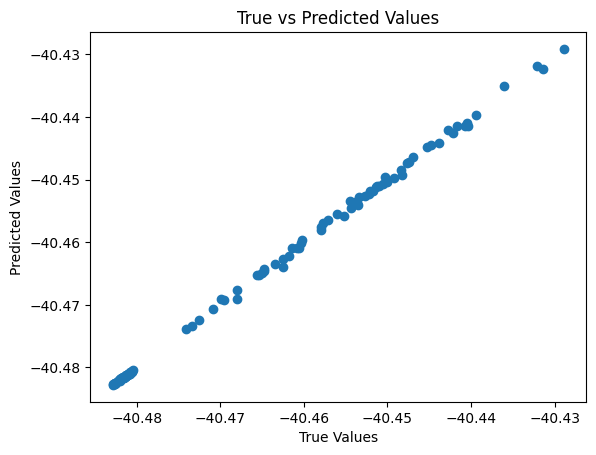

In [130]:
# Q1.C Exact solution of Linear Regression


# Generate X term in the equation by slicing
tdX = td[:,1:-1]
tpX = tp[:,1:-1]
print(tdX)
# Generate other terms like the transpose and the observations by slicing
tdtrans = np.transpose(tdX)
tdy = td[:,-1]
tpy = tp[:,-1]

wt_exact = np.matmul(np.linalg.inv(np.matmul(tdtrans, tdX)),np.matmul(tdtrans,tdy))
print("The optimal weights are",wt_exact)

print("Solving for the Jacobian gives the following vector:",-np.matmul(tdtrans,tdy) + np.matmul(tdtrans,np.matmul(tdX,wt_exact)))

y_predt_exact = tdX@wt_exact
errort_exact = tdy - y_predt_exact

plt.scatter(tdy,y_predt_exact)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

Plot

Coefficient Of Determination

In [131]:

SSRESt_exact = np.sum((errort_exact**2))
SSTOTp_exact = np.sum((tdy - np.mean(tdy))**2)
r2_exact = 1 - (SSRESt_exact/SSTOTp_exact)
print("The coefficient of determination for the exact solution is",r2_exact)

The coefficient of determination for the exact solution is 0.9992943416167023


Gradient Descent for Training Data:

In [132]:
# Parameters
eta = 2e-2 #learning rate
n_gradientdescent = len(tdX[0])
wold = np.ones(len(tdX[0])) * 0.01
# Normalize the data
tdX_gradientdescent = (tdX - np.mean(tdX, axis=0)) / np.std(tdX, axis=0)
tdX_gradientdescent = np.nan_to_num(tdX_gradientdescent, nan=1)
print(tdX_gradientdescent)

[[ 1.         -0.97549278 -1.02773577 ... -0.92141297 -0.87234097
  -0.79027575]
 [ 1.         -0.91135457 -0.22715456 ... -0.32244361 -0.91984102
  -0.11208084]
 [ 1.          0.6251963   1.50797871 ...  1.33490318  0.56929362
   2.6720353 ]
 ...
 [ 1.         -2.00258625 -1.69540973 ... -1.30702325 -1.66870299
  -0.71551316]
 [ 1.          0.09904061 -0.18629451 ... -0.33351875 -0.14767394
  -0.53667088]
 [ 1.          1.27926128  1.14760697 ...  0.99457836  1.3707174
   0.42452631]]


<ipython-input-132-0de9571d88a5>:6: RuntimeWarning: invalid value encountered in divide
  tdX_gradientdescent = (tdX - np.mean(tdX, axis=0)) / np.std(tdX, axis=0)


In [133]:
# Q1.C Gradient descent for Linear Regression
# code here

# Define the gradient and Loss Functions
def loss (w,x,y):
  return np.mean(0.5*(y - x@w)**2)
def gradient(w,x,y):
  gradient = (-x.T@y + x.T@x@w)/n_gradientdescent
  return gradient


#initialize some variables
w = wold
loss_values = np.zeros(1000000)
count = np.zeros(1000000)

loss_values[0] = loss(w,tdX_gradientdescent,tdy)
for i in range(1000000):

  count[i] = i
  w = w - eta*gradient(w,tdX_gradientdescent,tdy)
  loss_values[i + 1] = loss(w,tdX_gradientdescent,tdy)
  if np.linalg.norm(gradient(w,tdX_gradientdescent,tdy)) < 1e-5:
    break

print("The optimal weights are",w)




The optimal weights are [-4.04640015e+01 -5.46232096e-02  2.29647677e-02 -4.79999011e-02
 -2.11421650e-02  2.72298412e-02  8.37936844e-03 -5.46476913e-03
  6.40753092e-02 -3.62149901e-03 -1.99357203e-02 -7.90154659e-03
  3.15283808e-03 -1.75395577e-02  2.38265147e-02  1.38386029e-02
  1.69201155e-02  2.95485938e-02 -1.75346387e-02  2.18786754e-03
 -2.08015198e-02  3.02365200e-02  1.16900189e-02 -1.63034155e-02
 -9.06425897e-03 -1.46692557e-02 -1.70062708e-02  1.31465013e-02
 -5.43759825e-03  7.87283434e-03]


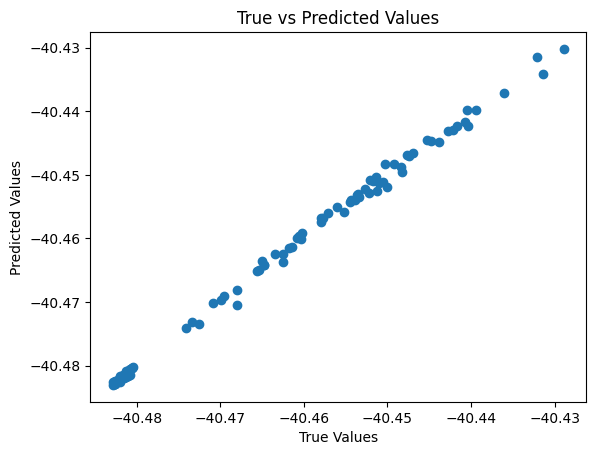

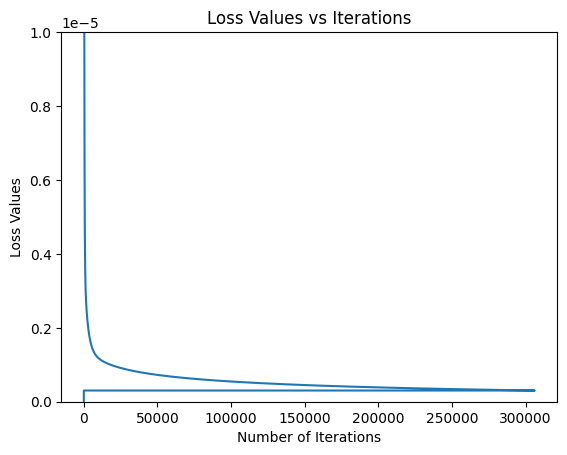

In [134]:
# Plot the predicted values and observed values
plt.scatter(tdy,tdX_gradientdescent@w)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()

# Plot the loss function as function of the number of iterations
plt.plot(count,loss_values)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.ylim(0, 1e-5)
plt.title("Loss Values vs Iterations")
plt.show()

Number of Iterations needed:

In [135]:
print("The number of iterations needed to get a good approxiamtion is ", max(count))

The number of iterations needed to get a good approxiamtion is  306187.0


Coefficient of Determination

In [136]:
train_mse_1 = np.mean((tdy - tdX@w)**2)
print("The training error is", train_mse_1)

error2 = tdy - tdX@w
SSRES2 = np.sum((error2**2))
SSTOT = np.sum((tdy - np.mean(tdy))**2)
r2_2 = 1 - (SSRES2/SSTOT)
print("The coefficient of determination for the gradient descent is",r2_2)


The training error is 0.00033315135033398536
The coefficient of determination for the gradient descent is -0.3505580205013217


Singular Value Decomposition

The optimal linear weights are  [-3.99428912e+01 -4.62863525e+00 -6.73262331e-01 -8.53422585e+01
  1.87532648e+02  3.52316731e+02  1.52527241e+02 -4.78067004e+02
  5.96049162e+01 -5.07067368e+02  6.61783150e+02 -1.51995881e+03
  4.94776156e+02 -1.25555829e+04  2.14794954e+03 -1.42399058e+03
 -6.54013870e+03  5.65481315e+04  4.28654476e+03 -9.07380054e+03
  3.62215718e+02  1.11988907e+01  5.95248707e+02  1.16234962e+03
 -4.26231207e+02  1.84720716e+04 -5.19023970e+03  1.91406636e+04
 -3.65573543e+02  9.45220022e+03]


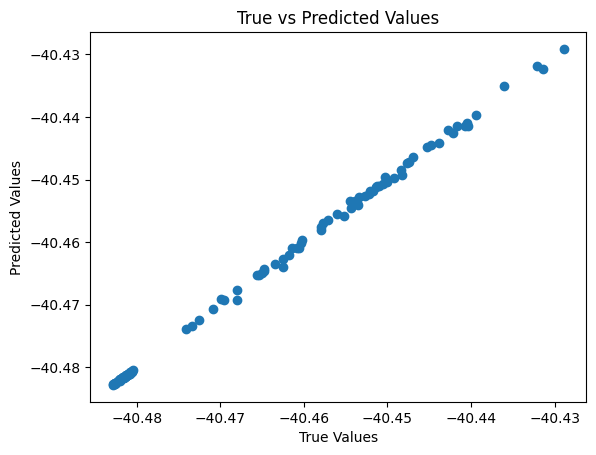

In [137]:
# Q1.C SVD for Linear Regression
# code here

svd = np.column_stack([np.ones(len(tdX)),tdX])

U,S,Vt = np.linalg.svd(tdX,full_matrices=False)

x_hat = Vt.T@np.linalg.inv(np.diag(S))@U.T@tdy

print("The optimal linear weights are ", x_hat)
y_pred = tdX@x_hat

train_mse3 = np.mean((tdy - y_pred)**2)


plt.scatter(tdy,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.show()


Coefficient of Determination

In [138]:
error3 = tdy - y_pred
SSRES3 = np.sum((error3**2))
SSTOT = np.sum((tdy - np.mean(tdy))**2)
r2_3 = 1 - (SSRES3/SSTOT)
print("The coefficient of determination for the SVD is",r2_3)

The coefficient of determination for the SVD is 0.9992969416776941


#Test Points


Question 2

Exact Solution

In [139]:
# Q1.C Exact solution of Linear Regression


# Generate X term in the equation
tpX = tp[:,1:-1]
print(tdX)
# Generate other terms like the transpose and the energies
tptrans = np.transpose(tpX)
tpy = tp[:,-1]

wp_exact = np.matmul(np.linalg.inv(np.matmul(tptrans, tpX)),np.matmul(tptrans,tpy))
print("The optimal weights are",wp_exact)

print("Solving for the Jacobian gives the following vector:",-np.matmul(tptrans,tpy) + np.matmul(tptrans,np.matmul(tpX,wp_exact)))



[[1.00000000e+00 1.80093880e-01 4.00869060e-02 ... 7.48982940e-06
  3.95067180e-04 2.27440820e-06]
 [1.00000000e+00 1.81269650e-01 4.54568680e-02 ... 1.08202750e-05
  3.88177840e-04 3.88032100e-06]
 [1.00000000e+00 2.09437420e-01 5.70954120e-02 ... 2.00356100e-05
  6.04159800e-04 1.04728915e-05]
 ...
 [1.00000000e+00 1.61265390e-01 3.56084300e-02 ... 5.34572300e-06
  2.79563970e-04 2.45144020e-06]
 [1.00000000e+00 1.99792030e-01 4.57309400e-02 ... 1.07586940e-05
  5.00171850e-04 2.87492480e-06]
 [1.00000000e+00 2.21427620e-01 5.46781900e-02 ... 1.81433040e-05
  7.20397160e-04 5.15096500e-06]]
The optimal weights are [-3.99929042e+01 -4.19292688e+00 -1.84170246e+00 -1.02233643e+02
  3.31362488e+02 -6.10949829e+02  2.80885498e+02 -1.30133795e+03
  4.50905991e+01 -5.09618469e+02  1.25146301e+03 -5.39544873e+03
 -3.76387891e+03  1.15740967e+04 -2.67269482e+03  1.85684453e+04
  1.35936357e+04 -4.28008516e+04 -6.52437188e+04  1.16167002e+04
 -7.68724844e+04  5.89213745e+02 -2.30035876e+03 -1



```
# This is formatted as code
```

Plot and Coefficient of Deterimination

The coefficient of determination for the exact solution is 0.9974175403411861


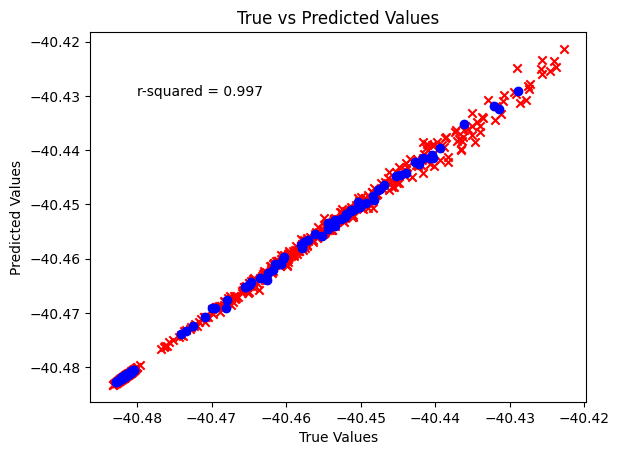

In [140]:
# Calculate Coefficient of Determination
y_predp_exact = tpX@wp_exact
errorp_exact = tpy - y_predp_exact
errorp_exact = tpy - tpX@wp_exact
SSRESp_exact = np.sum((errorp_exact**2))
SSTOTp_exact = np.sum((tpy - np.mean(tpy))**2)
r_pexact = 1 - (SSRESp_exact/SSTOTp_exact)
print("The coefficient of determination for the exact solution is",r_pexact)

# Plot the predicted values and observed values
plt.scatter(tpy,y_predp_exact,c = "red", marker = "x", label = "Test Points")
plt.scatter(tdy,tdX@wt_exact, c = "blue", marker = "o", label = "Training Data")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.annotate("r-squared = {:.3f}".format(r_pexact),(-40.48,-40.43))
plt.show()


Gradient Descent

In [141]:
# Parameters
etap = 4e-3 #learning rate
n = len(tpX[0])
woldp = np.ones(len(tpX[0])) * 0.01
# Normalize the data
tpX_gradientdescent = (tpX - np.mean(tpX, axis=0)) / np.std(tpX, axis=0)
tpX_gradientdescent = np.nan_to_num(tpX_gradientdescent, nan=1)
print(tpX)

[[1.00000000e+00 2.00611340e-01 4.86039850e-02 ... 1.36445100e-05
  5.35721000e-04 4.66230900e-06]
 [1.00000000e+00 2.16077390e-01 5.56089800e-02 ... 2.00353900e-05
  6.57773100e-04 8.06751700e-06]
 [1.00000000e+00 2.02346090e-01 4.46326700e-02 ... 1.06320030e-05
  6.40132350e-04 3.18476370e-06]
 ...
 [1.00000000e+00 1.76797690e-01 4.39730960e-02 ... 9.15547750e-06
  3.67236900e-04 4.99033880e-06]
 [1.00000000e+00 1.99294000e-01 4.50316220e-02 ... 1.01665755e-05
  4.94864900e-04 2.59943600e-06]
 [1.00000000e+00 2.08115100e-01 4.86223330e-02 ... 1.29052860e-05
  5.65221940e-04 3.31888260e-06]]


<ipython-input-141-fc057621d04c>:6: RuntimeWarning: invalid value encountered in divide
  tpX_gradientdescent = (tpX - np.mean(tpX, axis=0)) / np.std(tpX, axis=0)


In [142]:
# Q1.C Gradient descent for Linear Regression
# code here

# Define the gradient and Loss Functions
def loss (w,x,y):
  return np.mean(0.5*(y - x@w)**2)
def gradient(w,x,y):
  gradient = (-x.T@y + x.T@x@w)/n
  return gradient


#initialize some variables
wp = woldp
loss_valuesp = np.zeros(1000000)
countp = np.zeros(1000000)
j = 0

loss_valuesp[0] = loss(wp,tpX_gradientdescent,tpy)

for i in range(1000000):

  countp[i] = i
  wp = wp - etap*gradient(wp,tpX_gradientdescent,tpy)
  loss_valuesp[i + 1] = loss(wp,tpX_gradientdescent,tpy)
  j += 1
  if np.linalg.norm(gradient(wp,tpX_gradientdescent,tpy)) < 1e-4:
    break

loss_valuesp = loss_valuesp[:j]
countp = countp[:j]


print("The optimal weights are",wp)


The optimal weights are [-4.04627626e+01 -4.70993503e-02  1.16693483e-02 -3.43407725e-02
 -1.02494920e-02  2.38796526e-02  6.53573506e-03 -3.05139282e-04
  3.24591894e-02  1.00245831e-02 -1.43097357e-02 -1.19276255e-02
  3.26651502e-03 -9.25566265e-03  1.55257299e-02  8.87771074e-03
  1.48648170e-02  2.19177825e-02 -1.46868881e-02  4.16952616e-03
 -1.68843929e-02  1.77291500e-02  1.42588155e-02 -4.21346331e-03
 -1.49950513e-02 -1.46208424e-02 -1.80285018e-02  6.84911588e-03
  9.53154663e-03  5.81602488e-03]


Coefficient of Determination and Plot

The coefficient of determination for the gradient descent is 0.9938071249566391


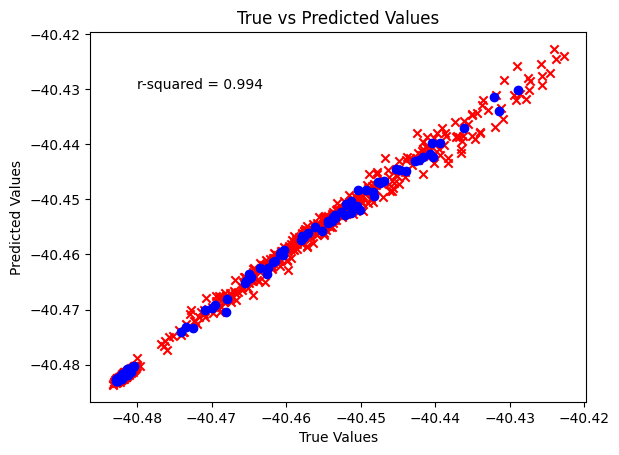

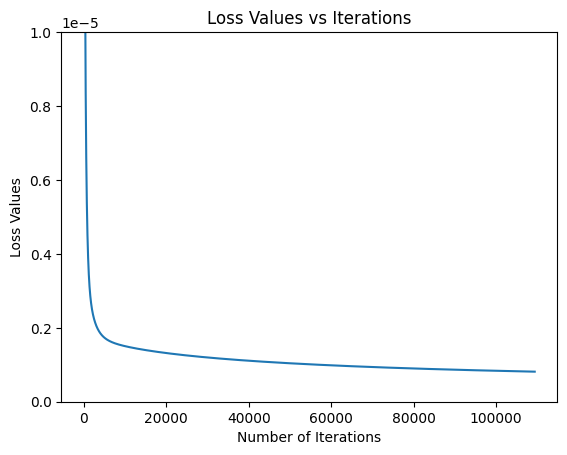

In [143]:
# Calculate Coefficient of Determination
errorp_gradient_descent = tpy - tpX_gradientdescent@wp
SSRES_gradient_descent = np.sum((errorp_gradient_descent**2))
SSTOT_gradient_descent = np.sum((tpy - np.mean(tpy))**2)
r_pgradient_descent = 1 - (SSRES_gradient_descent/SSTOT_gradient_descent)
print("The coefficient of determination for the gradient descent is",r_pgradient_descent)

# Plot the predicted values and observed values
plt.scatter(tpy,tpX_gradientdescent@wp,c = "red", marker = "x", label = "Test Points")
plt.scatter(tdy,tdX_gradientdescent@w, c = "blue", marker = "o", label = "Training Data")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values")
plt.annotate("r-squared = {:.3f}".format(r_pgradient_descent),(-40.48,-40.43))
plt.show()

# Plot the loss function as function of the number of iterations
plt.plot(countp,loss_valuesp)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss Values")
plt.ylim(0, 1e-5)
plt.title("Loss Values vs Iterations")
plt.show()

In [144]:
print("The number of iterations needed to get a good approxiamtion is ", max(countp))

The number of iterations needed to get a good approxiamtion is  109397.0


SVD

In [145]:
# Q1.C SVD for Linear Regression
# code here

svdp = np.column_stack([np.ones(len(tpX)),tpX])

Up,Sp,Vtp = np.linalg.svd(tpX,full_matrices=False)

x_hatp = Vtp.T@np.linalg.inv(np.diag(Sp))@Up.T@tpy

print("The optimal linear weights are ", x_hatp)

y_predp = tpX@x_hatp
train_mse3p = np.mean((tpy - y_predp)**2)




The optimal linear weights are  [-3.99928961e+01 -4.19289613e+00 -1.84265839e+00 -1.02236078e+02
  3.31382827e+02 -6.11000662e+02  2.80900447e+02 -1.30139359e+03
  4.50897235e+01 -5.09622137e+02  1.25152386e+03 -5.39574897e+03
 -3.76398508e+03  1.15741481e+04 -2.67268515e+03  1.85688869e+04
  1.35935010e+04 -4.27994855e+04 -6.52414298e+04  1.16167519e+04
 -7.68720870e+04  5.89216375e+02 -2.30036121e+03 -1.40251972e+03
  3.06083343e+03 -1.45152269e+04  1.57705913e+02 -5.64296935e+03
 -1.40375547e+02  8.41894175e+03]


Coefficient of Determination and Plot

In [146]:
errorp_svd = tpy - y_predp
SSRES3p_svd = np.sum((errorp_svd**2))
SSTOTp_svd = np.sum((tpy - np.mean(tpy))**2)
r2p_svd = 1 - (SSRES3p_svd/SSTOTp_svd)
print("The coefficient of determination for the SVD is",r2p_svd)

The coefficient of determination for the SVD is 0.9974179784424199


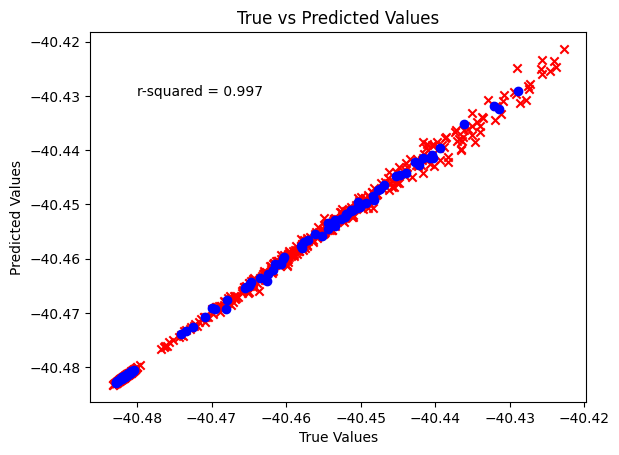

In [147]:
plt.scatter(tpy,y_predp,c = "red", marker = "x", label = "Test Points")
plt.scatter(tdy,y_pred, c = "blue", marker = "o", label = "Training Data")
plt.xlabel("True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.annotate("r-squared = {:.3f}".format(r2p_svd),(-40.48,-40.43))
plt.title("True vs Predicted Values")
plt.show()

Question 1 (Sorry I had to run question 2 to get weights)

30
30
30


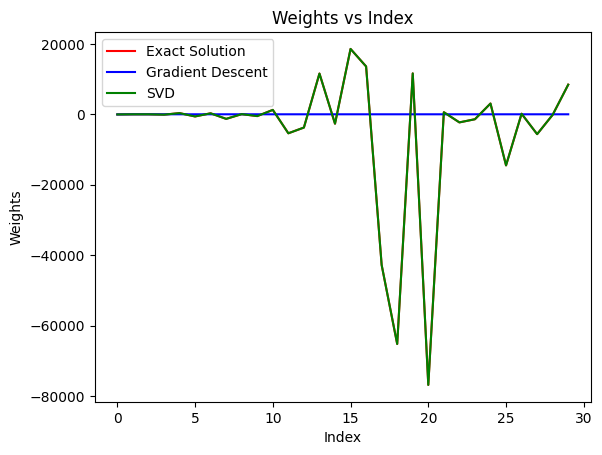

In [148]:
print(len(wp_exact))
print(len(wp))
print(len(x_hatp))
index = np.zeros(30)

for i in range(30):
  index[i] = i

plt.plot(index,wp_exact,c = "red", label = "Exact Solution")
plt.plot(index,wp,c = "blue", label = "Gradient Descent")
plt.plot(index,x_hatp,c = "green", label = "SVD")
plt.xlabel("Index")
plt.ylabel("Weights")
plt.title("Weights vs Index")
plt.legend()
plt.show()

The Gradient Descent Weights are normalized, so they will be different.

# Question 3:

The best method is probably the singular value decomposition since it yields the highest coefficient of determination. Gradient descent only really works if you normalize the data which comes with issues on its own because the linear weights need to be processed again.

#Question 4

In [149]:


rmse_svd = np.zeros(5)
for i in range(5):
  # Get Data and Process Data
  tp_iterate = mydata.sample(n=100)
  tp_iterate = tp_iterate.to_numpy()
  tpX_iterate = tp_iterate[:,1:-1]
  tpy_iterate = tp_iterate[:,-1]

  # Run the routines for SVD Decomposition
  svdp_iterate = np.column_stack([np.ones(len(tpX_iterate)),tpX_iterate])
  Up_iterate,Sp_iterate,Vtp_iterate = np.linalg.svd(tpX_iterate,full_matrices=False)
  x_hatp_iterate = Vtp_iterate.T@np.linalg.inv(np.diag(Sp_iterate))@Up_iterate.T@tpy_iterate

  #Compute Root-Mean Square Error
  y_predp_svd_iterate = tpX_iterate@x_hatp_iterate
  rmse_svd[i] = np.sqrt(np.mean((tpy_iterate - y_predp_svd_iterate)**2))


# Compute and print the mean and standard deviation of the error
print("The mean of the root mean square error is ", np.mean(rmse_svd))
print("The standard deviation of the root mean square error is ", np.std(rmse_svd))

The mean of the root mean square error is  0.00047969194258798366
The standard deviation of the root mean square error is  0.00013896072011005994


# (Q2) Newton's method for Nonlinear set of equations

* For **Q2** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

Let's consider the following reactions,
$$
ScF_3(s) \to Sc^{3+}(aq) + 3F^{-}(aq), \;\; K_{sp} = 4.2\times10^{-18}\\
HF(aq) + H_2O \to H_3O^{+}(aq) + F^{-}(aq), \;\; K_{a} = 5.6\times10^-4\\
2H_2O \to H_3O^{+} + OH^{-}(aq), \;\; K_w = 10^{-14}
$$


We can write the concentration values for each species at equilibrium using three main variables, $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
These give us the following relations,
$$
K_{sp} = x_{sp}(3x_{sp}+ x_a)^3 \\
K_{a} = \frac{(x_{a}+x_w)(3x_{sp} + x_a)}{-x_a} \\
K_w = (x_a+x_w)(x_w)
$$

You can use the following initial values for each species,
1. $x_{sp} = 2\times^{-5}$
2. $x_a = -6.2\times^{-4}$
3. $x_w = 6.2\times^{-4}$
   
```x0 = np.array([2E-5,-6.2E-4,62E-4])```. <br>

 <br>

**Results to include,**
1. Implement the Vector function to find $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
2. Implement the Jacobian function.
3. Implement the Newton's method step function.
4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.
5. The value of the concentrations.
6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.


Question 1,2,3

In [150]:
def equations_of_motion(x, k):
    # code here

    #initialize the x values
    xsp = x[0]
    xa = x[1]
    xw = x[2]
    #give functions to solve
    f1 = k[0]-xsp*(xsp*(3*xsp + xa))**3
    f2 = -k[1]*xa - (xa+xw)*(3*xsp+xa)
    f3 = k[2]-xw*(xa+xw)
    return np.array([f1,f2,f3])



def jacobian_of_equations_of_motion(x, k):
    # code here
    #Give jacobian
    jacobian = np.array([
        [-(3*x[0] + x[1])**3 - 9*x[0]*(3*x[0] + x[1])**2, -3*x[0]*(3*x[0]+x[1])**2, 0],
        [-3*(x[1]+x[2]), -k[1] - (4*x[1]+  3*x[0]  + 3*x[2]), -(3*x[0] + x[1])],
        [0, -x[2], -x[1] - 2*x[2]] ])
    return jacobian


def newton_step(x0,k):
    #code here
    #Use the equation to calculate next x-value
    x_next = x0 - np.linalg.inv(jacobian_of_equations_of_motion(x0,k)) @ equations_of_motion(x0,k)
    return x_next

In [151]:
# Newton's method
#initialize arrays/int
k = np.array([4.2E-18, 5.6E-4,1E-14])
x0 = np.array([2E-5,-6.2E-4,62E-4])
i = 0

#initialize size of array
x = np.zeros((100,3))
t = np.zeros((100,3))
#initialize first array element
x[0] = x0
t[0] = 0

#run loop to store values in array
for i in range(99):
  x[i+1] = newton_step(x[i],k)
  t[i+1] = t[i] + 1
  i += 1






Question 4 and 5

In [152]:
# Newton's method with a random initial guess
k = np.array([4.2E-18, 5.6E-4, 1E-14])
x0 = np.random.uniform(1E-3, 1E-3, (3,))

# code here for the iteration of Newton's method

#initialize array
f = np.zeros((100,3))
t = np.zeros((100,3))
f[0] = x0
t[0] = 0

#store
for i in range(99):
  f[i+1] = newton_step(f[i],k)
  t[i+1] = t[i] +   1
  i += 1


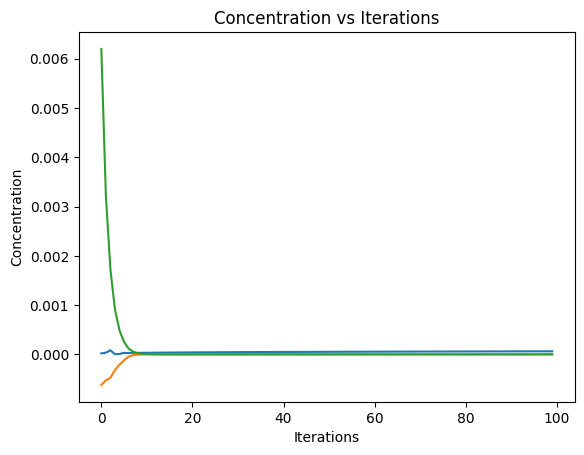

In [153]:
# Q2 Results
# 4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.

plt.plot(t,x)
plt.xlabel("Iterations")
plt.ylabel("Concentration")
plt.title("Concentration vs Iterations")
plt.show()


Question 6 and 7

The value of the concentrations are [[ 2.00000000e-05 -6.20000000e-04  6.20000000e-03]
 [ 3.46322298e-05 -5.27105997e-04  3.21426632e-03]
 [ 8.20412788e-05 -4.75993003e-04  1.72284056e-03]
 [ 4.07930454e-06 -3.14597290e-04  9.05859613e-04]
 [ 8.86385033e-06 -2.06986225e-04  4.82994146e-04]
 [ 3.07432854e-05 -1.19342888e-04  2.51583157e-04]
 [ 2.64146262e-05 -4.56822316e-05  1.16622153e-04]
 [ 3.13734438e-05 -1.56048079e-05  5.38117459e-05]
 [ 3.04593798e-05 -4.86149677e-06  2.51861641e-05]
 [ 3.12905912e-05 -2.00156487e-06  1.23557872e-05]
 [ 3.23633414e-05 -9.68606121e-07  6.16082782e-06]
 [ 3.34163534e-05 -4.88117280e-07  3.08336455e-06]
 [ 3.44100217e-05 -2.48283795e-07  1.54573744e-06]
 [ 3.53393578e-05 -1.27007081e-07  7.77943587e-07]
 [ 3.62076057e-05 -6.59008311e-08  3.97275469e-07]
 [ 3.70205185e-05 -3.60059727e-08  2.14027697e-07]
 [ 3.77843002e-05 -2.29956474e-08  1.35246431e-07]
 [ 3.85046221e-05 -1.92583240e-08  1.12268486e-07]
 [ 3.91860558e-05 -1.90933084e-08  1.10024531e

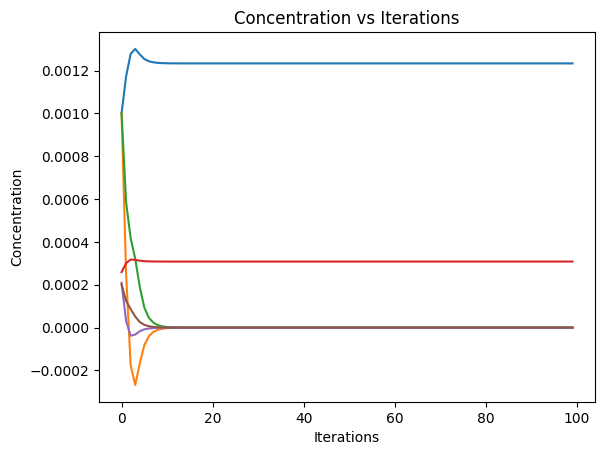

The values of the concentrations are different as shown by the graph


In [158]:
# 5. The value of the concentrations.
print("The value of the concentrations are", x)

# 6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
m = 0 #initialize a counter
for i in range(99):
  if (np.linalg.norm(x[i+1] - x[i]) < 1e-4): #set condition for breaking the loop
    break

  m +=1 #increment
  i +=1

print("The number of iterations required for the concentration change to be less than 1E-4 is: ",m)
# 7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.

x0 = np.random.uniform(1E-5,1E-3,(3,))

c = np.zeros((100,3))
t = np.zeros((100,3))
c[0] = x0

for i in range(99):
  c[i+1] = newton_step(c[i],k)
  t[i+1] = t[i] + 1
  i += 1

plt.plot(t,f,c)
plt.xlabel("Iterations")
plt.ylabel("Concentration")
plt.title("Concentration vs Iterations")
plt.show()

print("The values of the concentrations are different as shown by the graph")

# Hückel model
As we saw in class, the Hückel model is one of the most basic models to describe the interaction between electrons in a molecule. <br>
The Hückel model is based on the following assumptions:
1. Only next-nearest neighbors atoms form bonds and if so $S_{ij} = 1$, else $S_{ij} = 0$.
2. The matrix elements of the Hamiltonian are described depending on the type of atom. <br>
   We will follow the notation of the paper, [A Pariser-Parr-Pople-based set of Hueckel molecular orbital parameters](https://pubs.acs.org/doi/abs/10.1021/jo01311a060), <br>
   where the diagonal elements ($h_i$) and off-diagonal elements ($h_{ij}$) are given by,

    $$
    h_{i} = \alpha_0 + h_{X} \beta_0 \\
    h_{ij} = h_{X,Y} \beta_0 \\
    $$
    
Table 1 and 2 from [paper](https://pubs.acs.org/doi/abs/10.1021/jo01311a060) have those respected values.
1. Table 1 $\to$ $h_i$ for different types of atoms.
2. Table 2 $\to$ $ h_{X,Y}$ for different types of atoms, $X$ and $Y$ are the index for the type of atoms that form a bond.

**Results to include,**
1. What is the **HOMO-LUMO** value for Benzene.
2. Plot HOMO or LUMO orbital using the ```plot_benzene_with_lcao_circles()``` function.

In [155]:
def create_hamiltonian_for_benzene():
    # code here
    H = np.zeros((6,6))
    for i in range(6):
        for j in range(6):
          if (i == j):
            H[i][j] = 0
          if (i == j+1):
            H[i][j] = 1
          if (i == j-1):
            H[i][j] = 1
          if (i == j + 5):
            H[i][j] = 1
          if (i == j - 5):
            H[i][j] = 1
    return H

print (create_hamiltonian_for_benzene())

def diagonalize_hamiltonian():
    # code here
    H = create_hamiltonian_for_benzene()
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    return eigenvalues, eigenvectors
eigenvalues, eigenvectors = diagonalize_hamiltonian()
print (eigenvalues)
print (eigenvectors)

[[0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0.]]
[-2. -1. -1.  1.  1.  2.]
[[ 0.40824829  0.57735027  0.          0.57735027  0.          0.40824829]
 [-0.40824829 -0.28867513 -0.5         0.28867513 -0.5         0.40824829]
 [ 0.40824829 -0.28867513  0.5        -0.28867513 -0.5         0.40824829]
 [-0.40824829  0.57735027  0.         -0.57735027  0.          0.40824829]
 [ 0.40824829 -0.28867513 -0.5        -0.28867513  0.5         0.40824829]
 [-0.40824829 -0.28867513  0.5         0.28867513  0.5         0.40824829]]


In [156]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Define the benzene molecule coordinates
def benzene_positions():
    # 6 evenly spaced points around a circle
    theta = np.linspace(0, 2 * np.pi, 7)[:-1]
    radius = 1.0
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y]).T

# Plot benzene with LCAO magnitudes
def plot_benzene_with_lcao_circles(magnitudes):
    positions = benzene_positions()
    # magnitudes = generate_lcao_magnitudes()

    # Normalize magnitudes for color mapping
    norm = Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
    colormap = plt.cm.viridis

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot benzene structure
    for i in range(len(positions)):
        ax.plot(
            [positions[i, 0], positions[(i + 1) % len(positions), 0]],
            [positions[i, 1], positions[(i + 1) % len(positions), 1]],
            'k-', lw=2
        )

    # Plot circles for each carbon atom
    for pos, mag in zip(positions, magnitudes):
        color = colormap(norm(mag))
        circle = plt.Circle(pos, radius=0.2, color=color,
                            edgecolor='black', lw=1)
        ax.add_artist(circle)
        ax.text(pos[0], pos[1], f"{mag:.2f}", fontsize=8,
                ha='center', va='center', color='white')

    # Add colorbar
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array(magnitudes)
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Magnitude of LCAO")

    # Adjust plot limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    plt.title("Benzene with LCAO Magnitudes (Circles by Magnitude)")
    plt.show()


Question 1: The HOMO Looks to be of magnitude -1 and the LUMO looks to be of magniutde 1.

Question 2:

<ipython-input-156-5873fd6eb364>:37: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle(pos, radius=0.2, color=color,


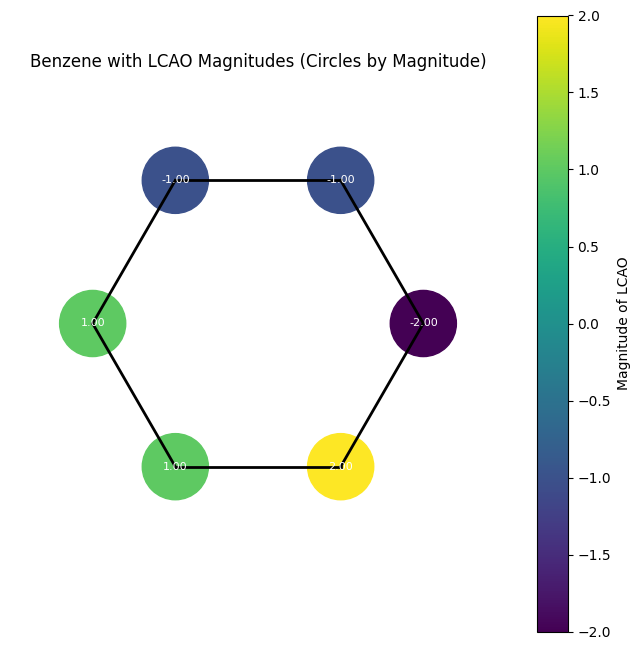

In [157]:
# LCAO data: random magnitudes for demonstration (replace with actual data)

plot_benzene_with_lcao_circles(eigenvalues)